In [2]:
from pyspark.sql import SparkSession

# Create a SparkSession with the MongoDB Spark Connector
spark = SparkSession.builder \
    .appName("MongoDB Spark Connector") \
    .config("spark.mongodb.input.uri", "mongodb://localhost:27017") \
    .config("spark.mongodb.output.uri", "mongodb://localhost:27017") \
    .config("spark.jars.packages", "org.mongodb.spark:mongo-spark-connector_2.12:3.0.1") \
    .getOrCreate()

In [3]:
# Load data from MongoDB into a PySpark DataFrame
df = spark.read.format("mongo") \
    .option("database", "Flight_Delay_Analysis") \
    .option("collection","aggregated_columns") \
    .load()

# Show the first 20 rows of the DataFrame
df.show(20)

+-----------------+-------+--------+-------+----------+----------+--------------+---------+------------+---------+----------+--------+-------+----+--------+--------+---------+-----------------+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+--------------------+
|ActualElapsedTime|AirTime|ArrDelay|ArrTime|CRSArrTime|CRSDepTime|CRSElapsedTime|Cancelled|CarrierDelay|DayOfWeek|DayofMonth|DepDelay|DepTime|Dest|Distance|Diverted|FlightNum|LateAircraftDelay|Month|NASDelay|Origin|SecurityDelay|TailNum|TaxiIn|TaxiOut|UniqueCarrier|WeatherDelay|Year|                 _id|
+-----------------+-------+--------+-------+----------+----------+--------------+---------+------------+---------+----------+--------+-------+----+--------+--------+---------+-----------------+-----+--------+------+-------------+-------+------+-------+-------------+------------+----+--------------------+
|              215|    210|     -14|   1056|      1110|       810|           240| 

In [ ]:
df.show(1,vertical=True)

-RECORD 0---------------------------------
 ActualElapsedTime | 77                   
 AirTime           | NA                   
 ArrDelay          | 31                   
 ArrTime           | 1008                 
 CRSArrTime        | 937                  
 CRSDepTime        | 830                  
 CRSElapsedTime    | 67                   
 Cancelled         | 0                    
 CarrierDelay      | NA                   
 DayOfWeek         | 4                    
 DayofMonth        | 1                    
 DepDelay          | 21                   
 DepTime           | 851                  
 Dest              | SFO                  
 Distance          | 337                  
 Diverted          | 0                    
 FlightNum         | 1457                 
 LateAircraftDelay | NA                   
 Month             | 10                   
 NASDelay          | NA                   
 Origin            | LAX                  
 SecurityDelay     | NA                   
 TailNum   

In [ ]:
df.printSchema()

root
 |-- ActualElapsedTime: string (nullable = true)
 |-- AirTime: string (nullable = true)
 |-- ArrDelay: string (nullable = true)
 |-- ArrTime: string (nullable = true)
 |-- CRSArrTime: string (nullable = true)
 |-- CRSDepTime: string (nullable = true)
 |-- CRSElapsedTime: string (nullable = true)
 |-- Cancelled: string (nullable = true)
 |-- CarrierDelay: string (nullable = true)
 |-- DayOfWeek: string (nullable = true)
 |-- DayofMonth: string (nullable = true)
 |-- DepDelay: string (nullable = true)
 |-- DepTime: string (nullable = true)
 |-- Dest: string (nullable = true)
 |-- Distance: string (nullable = true)
 |-- Diverted: string (nullable = true)
 |-- FlightNum: string (nullable = true)
 |-- LateAircraftDelay: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- NASDelay: string (nullable = true)
 |-- Origin: string (nullable = true)
 |-- SecurityDelay: string (nullable = true)
 |-- TailNum: string (nullable = true)
 |-- TaxiIn: string (nullable = true)
 |-- Tax

In [ ]:
#checking for data inconsistencies 
from pyspark.sql.functions import col,isnan,when,count
df1 = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == 'NA' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df1.show(vertical=True)

-RECORD 0---------------------
 ActualElapsedTime | 224840   
 AirTime           | 14896380 
 ArrDelay          | 224840   
 ArrTime           | 224840   
 CRSArrTime        | 0        
 CRSDepTime        | 0        
 CRSElapsedTime    | 0        
 Cancelled         | 0        
 CarrierDelay      | 14896380 
 DayOfWeek         | 0        
 DayofMonth        | 0        
 DepDelay          | 184045   
 DepTime           | 184045   
 Dest              | 0        
 Distance          | 38016    
 Diverted          | 0        
 FlightNum         | 0        
 LateAircraftDelay | 14896380 
 Month             | 0        
 NASDelay          | 14896380 
 Origin            | 0        
 SecurityDelay     | 14896380 
 TailNum           | 14896380 
 TaxiIn            | 14896380 
 TaxiOut           | 14896380 
 UniqueCarrier     | 0        
 WeatherDelay      | 14896380 
 Year              | 0        
 _id               | 0        



In [ ]:
#percentage of data inconsistency in each column 
from pyspark.sql.functions import col,lit
missing_df = df.select([(count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == 'NA' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           ))/count(lit(1))).alias(c) for c in df.columns])
missing_df.show(vertical=True)

-RECORD 0---------------------------------
 ActualElapsedTime | 0.01509359992159169  
 AirTime           | 1.0                  
 ArrDelay          | 0.01509359992159169  
 ArrTime           | 0.01509359992159169  
 CRSArrTime        | 0.0                  
 CRSDepTime        | 0.0                  
 CRSElapsedTime    | 0.0                  
 Cancelled         | 0.0                  
 CarrierDelay      | 1.0                  
 DayOfWeek         | 0.0                  
 DayofMonth        | 0.0                  
 DepDelay          | 0.012355015111053826 
 DepTime           | 0.012355015111053826 
 Dest              | 0.0                  
 Distance          | 0.002552029419228... 
 Diverted          | 0.0                  
 FlightNum         | 0.0                  
 LateAircraftDelay | 1.0                  
 Month             | 0.0                  
 NASDelay          | 1.0                  
 Origin            | 0.0                  
 SecurityDelay     | 1.0                  
 TailNum   

In [ ]:
# Define the list of columns to drop
columns_to_drop = ['AirTime', 'CarrierDelay', 'TailNum', 'TaxiIn', 'TaxiOut', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay', 'WeatherDelay']

# Drop the columns from the DataFrame
df = df.drop(*columns_to_drop)


In [ ]:
df.show()

+-----------------+--------+-------+----------+----------+--------------+---------+---------+----------+--------+-------+----+--------+--------+---------+-----+------+-------------+----+--------------------+
|ActualElapsedTime|ArrDelay|ArrTime|CRSArrTime|CRSDepTime|CRSElapsedTime|Cancelled|DayOfWeek|DayofMonth|DepDelay|DepTime|Dest|Distance|Diverted|FlightNum|Month|Origin|UniqueCarrier|Year|                 _id|
+-----------------+--------+-------+----------+----------+--------------+---------+---------+----------+--------+-------+----+--------+--------+---------+-----+------+-------------+----+--------------------+
|               77|      31|   1008|       937|       830|            67|        0|        4|         1|      21|    851| SFO|     337|       0|     1457|   10|   LAX|           PS|1987|645fb429a7b804f04...|
|               77|      11|    948|       937|       830|            67|        0|        5|         2|       1|    831| SFO|     337|       0|     1457|   10|   LAX| 

In [ ]:
#checking for data inconsistencies 
from pyspark.sql.functions import col,isnan,when,count
df = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == 'NA' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df.show(vertical=True)

-RECORD 0-------------------
 ActualElapsedTime | 224840 
 ArrDelay          | 224840 
 ArrTime           | 224840 
 CRSArrTime        | 0      
 CRSDepTime        | 0      
 CRSElapsedTime    | 0      
 Cancelled         | 0      
 DayOfWeek         | 0      
 DayofMonth        | 0      
 DepDelay          | 184045 
 DepTime           | 184045 
 Dest              | 0      
 Distance          | 38016  
 Diverted          | 0      
 FlightNum         | 0      
 Month             | 0      
 Origin            | 0      
 UniqueCarrier     | 0      
 Year              | 0      
 _id               | 0      



In [ ]:
numerical_cols = [col_name for col_name, data_type in df.dtypes if data_type in ['int', 'double']]
for col_name in numerical_cols:
    col_median = df.approxQuantile(col_name, [0.5], 0)[0]
    df = df.withColumn(col_name, col(col_name).fillna(col_median))

In [ ]:
#checking for data inconsistencies 
from pyspark.sql.functions import col,isnan,when,count
df = df.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == 'NA' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df.columns])
df.show(vertical=True)

-RECORD 0----------------
 ActualElapsedTime | 0   
 ArrDelay          | 0   
 ArrTime           | 0   
 CRSArrTime        | 0   
 CRSDepTime        | 0   
 CRSElapsedTime    | 0   
 Cancelled         | 0   
 DayOfWeek         | 0   
 DayofMonth        | 0   
 DepDelay          | 0   
 DepTime           | 0   
 Dest              | 0   
 Distance          | 0   
 Diverted          | 0   
 FlightNum         | 0   
 Month             | 0   
 Origin            | 0   
 UniqueCarrier     | 0   
 Year              | 0   
 _id               | 0   



In [ ]:
spark = SparkSession.builder.appName('ReadCSV').getOrCreate()

# Read CSV file into a Spark DataFrame
df = spark.read.format('csv').option('header', 'true').load('eda_file2.csv')

# Show the first 10 rows of the DataFrame
df.show(10)

+-----------------+--------+-------+----------+----------+--------------+---------+---------+----------+--------+-------+----+--------+--------+---------+-----+------+-------------+----+--------------------+
|ActualElapsedTime|ArrDelay|ArrTime|CRSArrTime|CRSDepTime|CRSElapsedTime|Cancelled|DayOfWeek|DayofMonth|DepDelay|DepTime|Dest|Distance|Diverted|FlightNum|Month|Origin|UniqueCarrier|Year|                 _id|
+-----------------+--------+-------+----------+----------+--------------+---------+---------+----------+--------+-------+----+--------+--------+---------+-----+------+-------------+----+--------------------+
|              269|       8|   1735|      1727|      1500|           267|        0|        3|        25|       6|   1506| SFO|    1846|       0|      575|    9|   ORD|           AA|1991|645fce8ba7b804f04...|
|              265|      22|   1749|      1727|      1500|           267|        0|        4|        26|      24|   1524| SFO|    1846|       0|      575|    9|   ORD| 

<ipython-input-16-3f6c0c8c4364>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dff.corr(),cmap='viridis')


<Axes: >

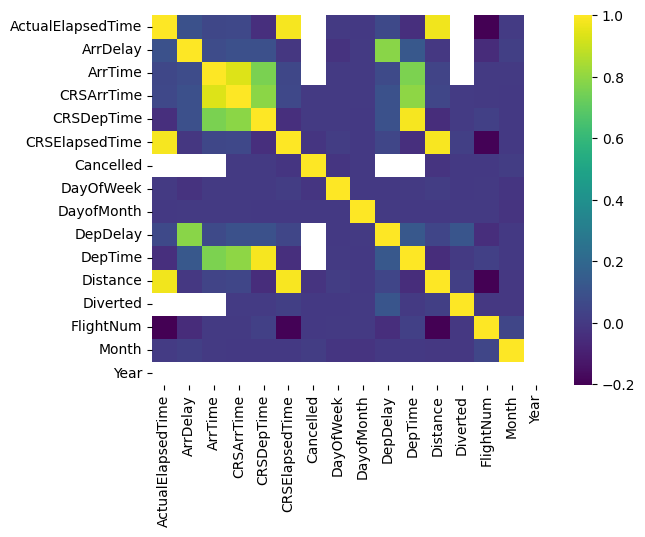

In [ ]:
import pandas as pd
dff=pd.read_csv('eda_file2.csv')
import seaborn as sns
sns.heatmap(dff.corr(),cmap='viridis')

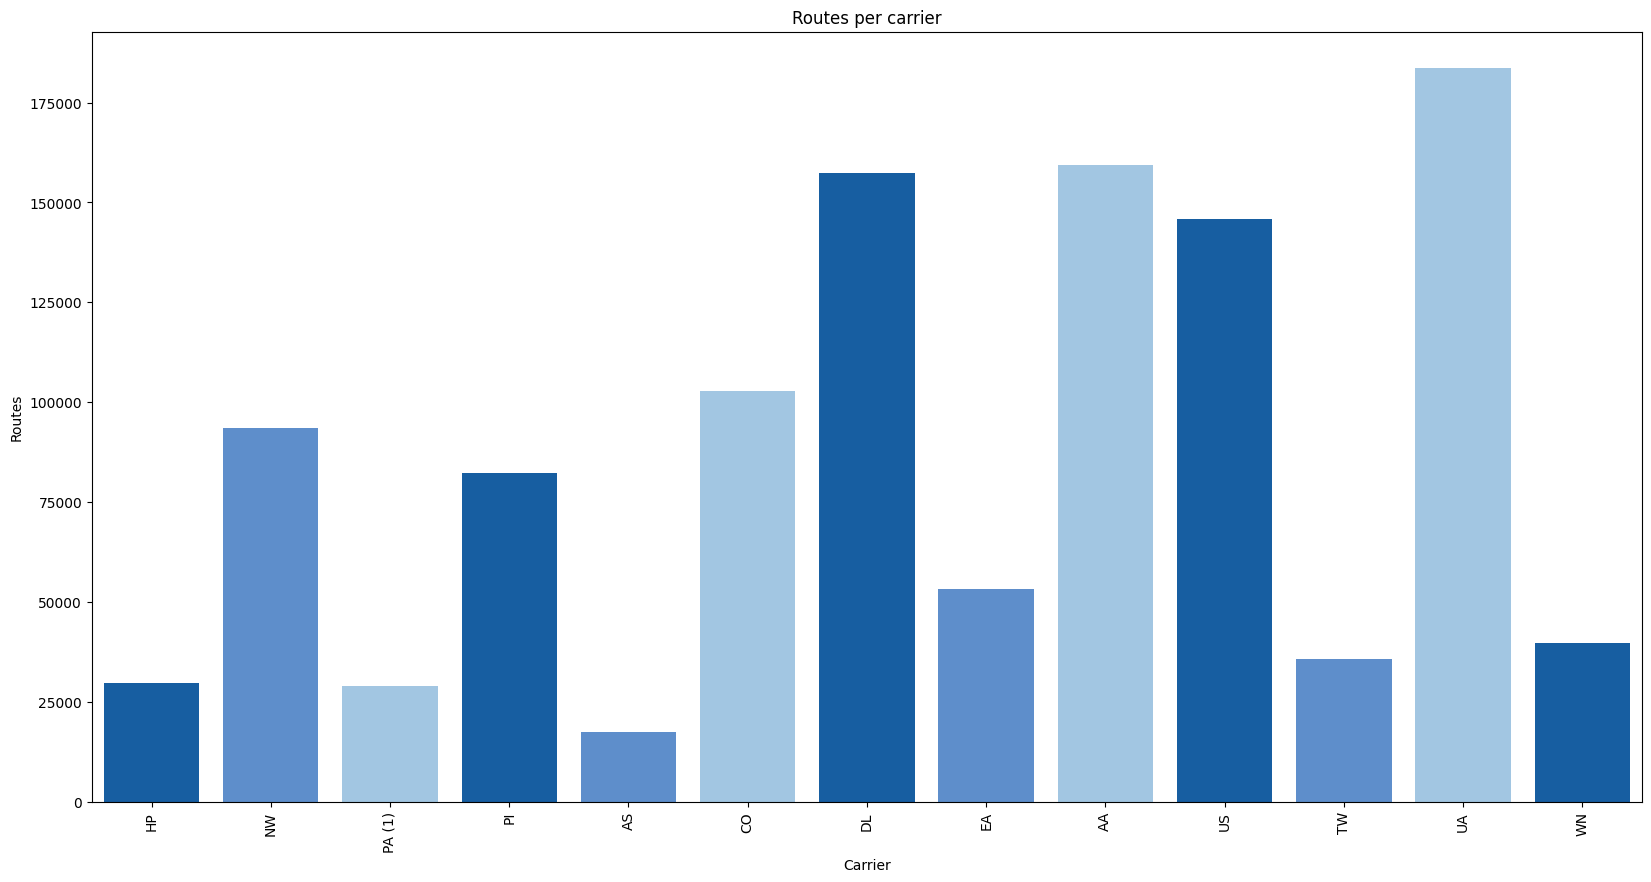

In [ ]:
import matplotlib.pyplot as plt
custom_palette = sns.color_palette(["#005EB8", "#4C8CDD", "#97C7ED"])
sns.countplot(x='UniqueCarrier', palette=custom_palette, data=dff)
plt.gcf().set_size_inches(20,10)
plt.title('Routes per carrier')
plt.xlabel('Carrier')
plt.xticks(rotation='vertical')
plt.ylabel('Routes')
plt.show()

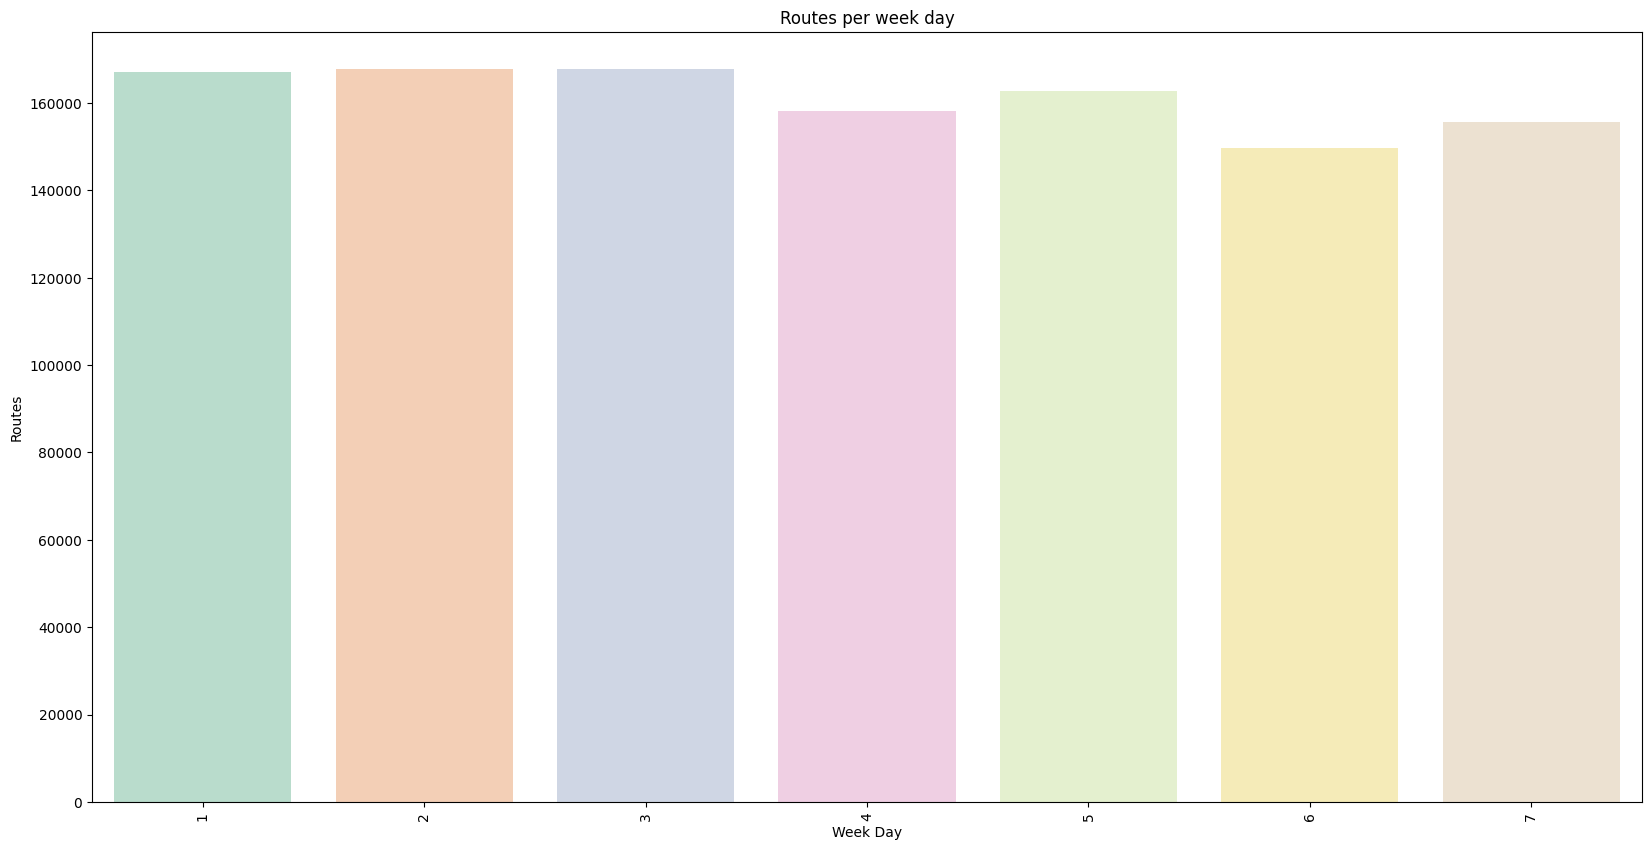

In [ ]:
sns.barplot(data=dff, x='DayOfWeek', y='FlightNum', estimator=len, palette="Pastel2")
plt.gcf().set_size_inches(20,10)
plt.title('Routes per week day')
plt.xlabel('Week Day')
plt.xticks(rotation='vertical')
plt.ylabel('Routes')
plt.show()

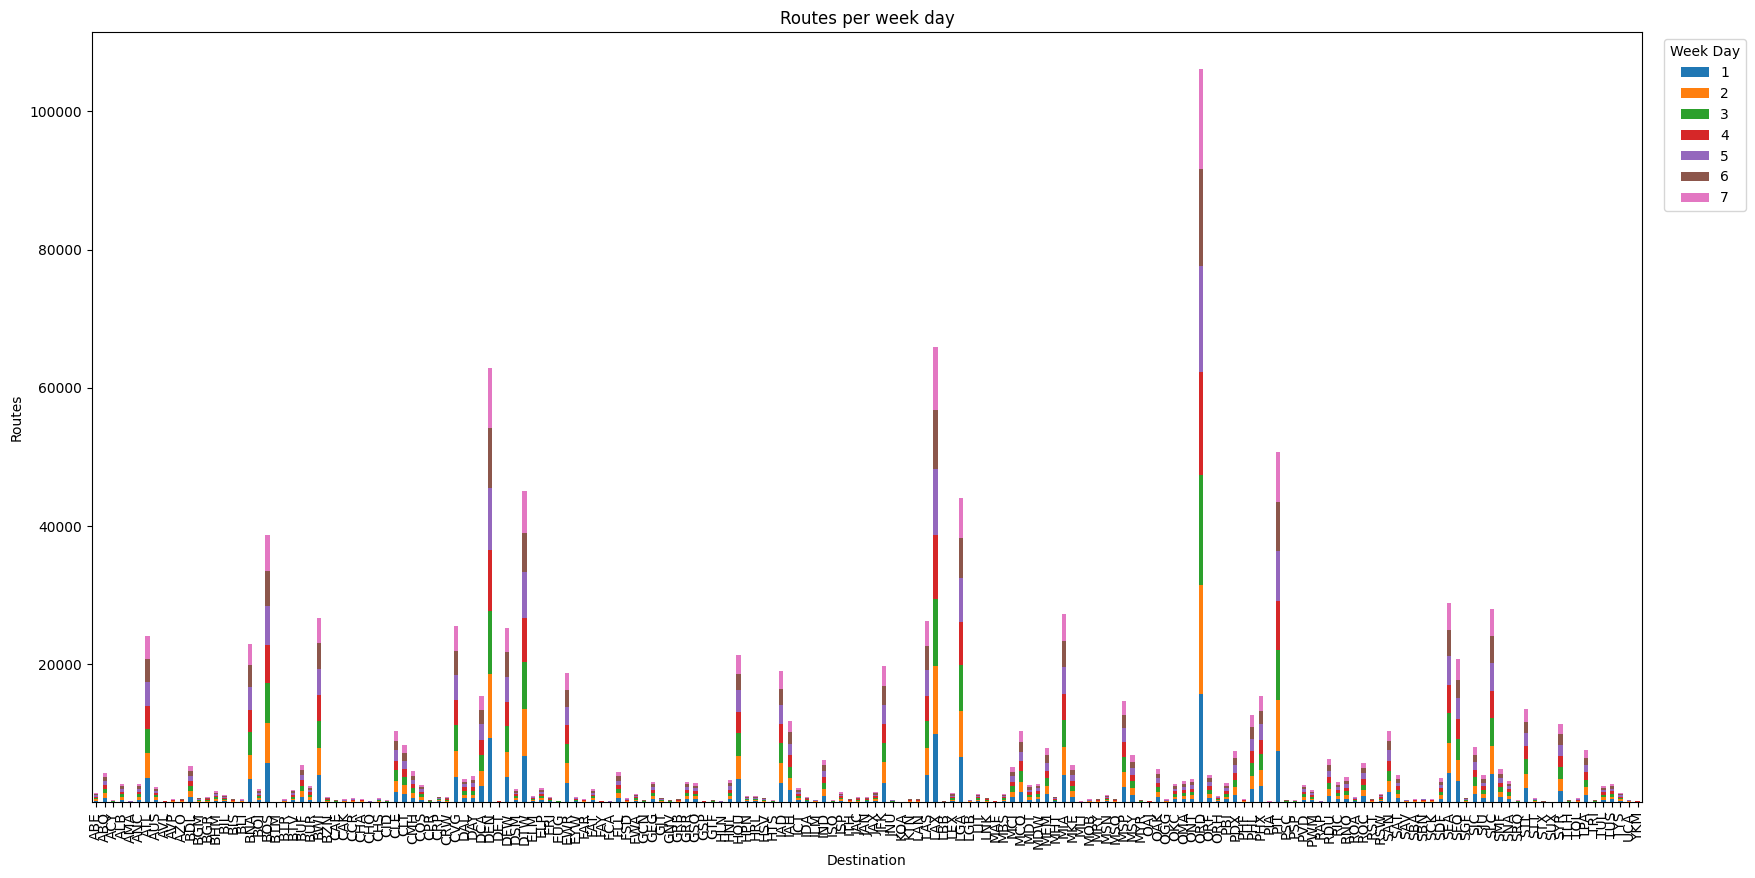

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Group data by DayOfWeek and Dest
grouped_data = dff.groupby(['DayOfWeek', 'Dest'])['Dest'].count().unstack('DayOfWeek')

# Create stacked bar chart
fig, ax = plt.subplots(figsize=(20, 10))
grouped_data.plot(kind='bar', stacked=True, ax=ax)

# Set labels and title
ax.set_xlabel('Destination')
ax.set_ylabel('Routes')
ax.set_title('Routes per week day')

# Set legend outside of the plot
ax.legend(title='Week Day', bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

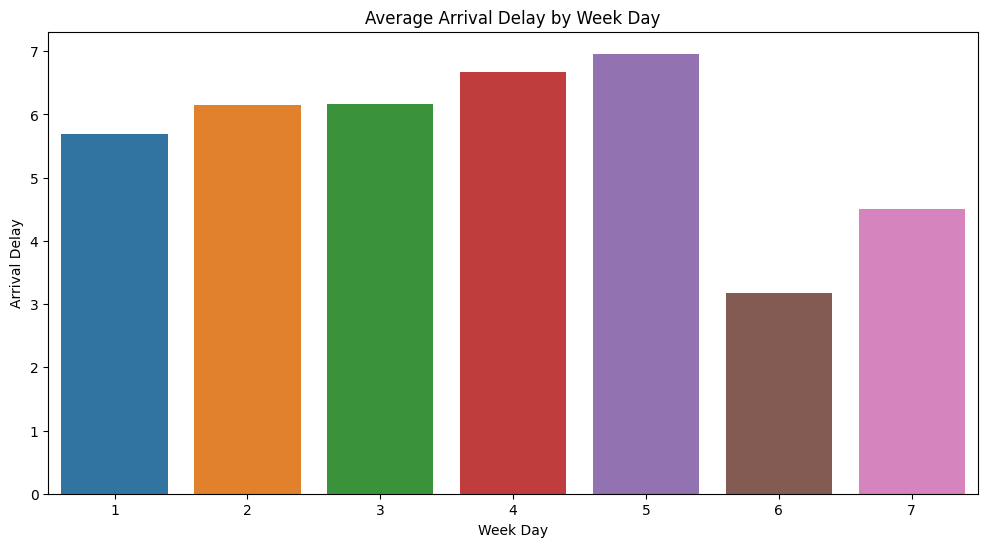

In [ ]:
arr_delay = dff.groupby('DayOfWeek').agg(avg_arr_delay=('ArrDelay', 'mean'))
arr_delay.reset_index(inplace=True)

fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(x='DayOfWeek', y='avg_arr_delay', data=arr_delay, ax=ax)
ax.set(title='Average Arrival Delay by Week Day', xlabel='Week Day', ylabel='Arrival Delay')
plt.show()

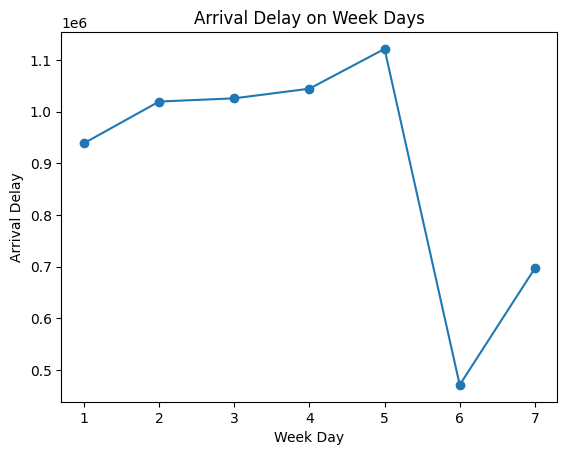

In [ ]:
arr_delay= dff.groupby('DayOfWeek').agg(
    sum_arr_delay = ('ArrDelay','sum')
)
temp = pd.DataFrame({
    'Week Day': arr_delay.index,
    'Arr Delay' : arr_delay.sum_arr_delay.values
})
plt.plot(temp['Week Day'], temp['Arr Delay'], marker='o')
plt.xlabel("Week Day")
plt.ylabel("Arrival Delay")
plt.title("Arrival Delay on Week Days")
plt.show()

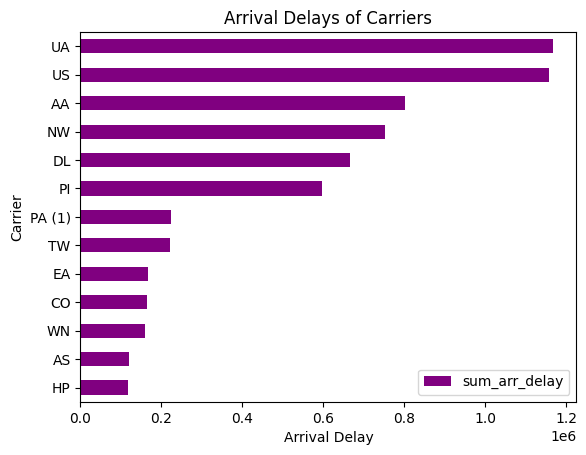

In [ ]:
arr_delay = dff.groupby('UniqueCarrier').agg(sum_arr_delay=('ArrDelay', 'sum'))
arr_delay.sort_values(by='sum_arr_delay', ascending=True, inplace=True)
arr_delay.plot(kind='barh', color='purple')
plt.xlabel('Arrival Delay')
plt.ylabel('Carrier')
plt.title('Arrival Delays of Carriers')
plt.show()


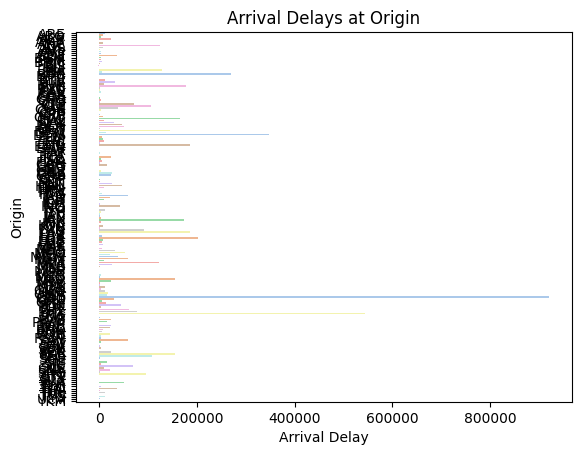

In [ ]:
import seaborn as sns

arr_delay = dff.groupby('Origin').agg(sum_arr_delay=('ArrDelay', 'sum'))
temp = pd.DataFrame({'Origin': arr_delay.index, 'Arrival Delay': arr_delay.sum_arr_delay.values})

sns.barplot(x='Arrival Delay', y='Origin', data=temp, palette='pastel')
plt.xlabel('Arrival Delay')
plt.ylabel('Origin')
plt.title('Arrival Delays at Origin')
plt.show()


In [ ]:
df.show()

+-----------------+--------+-------+----------+----------+--------------+---------+---------+----------+--------+-------+----+--------+--------+---------+-----+------+-------------+----+--------------------+
|ActualElapsedTime|ArrDelay|ArrTime|CRSArrTime|CRSDepTime|CRSElapsedTime|Cancelled|DayOfWeek|DayofMonth|DepDelay|DepTime|Dest|Distance|Diverted|FlightNum|Month|Origin|UniqueCarrier|Year|                 _id|
+-----------------+--------+-------+----------+----------+--------------+---------+---------+----------+--------+-------+----+--------+--------+---------+-----+------+-------------+----+--------------------+
|              269|       8|   1735|      1727|      1500|           267|        0|        3|        25|       6|   1506| SFO|    1846|       0|      575|    9|   ORD|           AA|1991|645fce8ba7b804f04...|
|              265|      22|   1749|      1727|      1500|           267|        0|        4|        26|      24|   1524| SFO|    1846|       0|      575|    9|   ORD| 